In [ ]:
import bw2data as bwd
import bw2io
import bw2calc as bwc
from ulcarchetype.utils import get_cf_info,minmax_archetype,cf_add_uncertainty
from ulcarchetype.utils import LCIAMethod
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# or instead use an existing project with the biosphere3 database and
# standard impact assessment methods
bwd.projects.set_current('test_ulcarchetype')

In [ ]:
bw2io.bw2setup()

Biosphere database already present!!! No setup is needed


In [ ]:
bwd.databases

Databases dictionary with 2 object(s):
	biosphere3
	test_db

as example lets use a method with not many characterisation factors

In [ ]:
method = ('EF v3.0', 'particulate matter formation', 'impact on human health')

In [ ]:
assert method in bwd.methods

## new implementation

## get_cf_info

In [11]:
cf_df = get_cf_info(method)
cf_df

MultipleResults: Found 4709 results for the given search

## minmax_archetype

In [7]:
minmax_archetype(cf_df)

,code,name,amount,minimum,maximum,compartment
114,"(biosphere3, 9d9246d4-0ce3-4b47-8491-cf62e562a...",Cesium-134,1.300000e+01,5.400000,1.300000e+01,water
116,"(biosphere3, 8bbe0b4c-5c9c-4959-a878-572f680e4...",Cesium-137,1.600000e+01,5.400000,1.600000e+01,water
152,"(biosphere3, 8d8e393e-39c4-44e1-b424-8eeefcd33...",Cobalt-60,4.200000e+00,4.200000,2.600000e+01,water
251,"(biosphere3, deb80fa5-4d0a-427e-9526-443f88d17...","Ethane, 1,2-dichloro-",4.600000e+05,120000.000000,4.600000e+05,water
265,"(biosphere3, 4b0d68e7-37bc-4184-93b5-91b70c62e...","Ethene, tetrachloro-",1.900000e+07,150000.000000,1.900000e+07,water
371,"(biosphere3, 9be02ae0-3170-4544-8665-f03a1b43f...","Hydrogen-3, Tritium",4.200000e-05,0.000042,4.700000e-03,water
517,"(biosphere3, 5189de76-6bbb-44ba-8c42-5714f1b43...",Nitrate,1.300000e+04,13000.000000,2.700000e+04,water
660,"(biosphere3, e8c62990-85c7-4f16-ab5f-76a5fc28a...","Radioactive species, Nuclides, unspecified",2.800000e+00,2.800000,3.300000e+02,water
770,"(biosphere3, 1869fd74-ed68-4814-9596-12315b1e8...",Uranium-234,2.300000e-01,0.230000,1.600000e+00,water
772,"(biosphere3, 4d466648-95dd-4866-97ad-6008746d3...",Uranium-235,2.200000e-01,0.220000,1.700000e+00,water


## cf_add_uncertainty

In [8]:
cfs = cf_add_uncertainty(method,uncertainty_type=4)

In [9]:
len(cfs)

1602

the result is a list of characterisation factors in the format needed to create a brightway2 method.

In [10]:
len(bwd.Method(method).load())

1602

some of these are uncertain, they can be distinguished because their value is not a variable of type float but a dict

In [11]:
[(key,cfvalue) for key,cfvalue in cfs if isinstance(cfvalue,float)==False]

[(('biosphere3', '9d9246d4-0ce3-4b47-8491-cf62e562ad38'),
  {'amount': 13.0, 'maximum': 13.0, 'minimum': 5.4, 'uncertainty type': 4}),
 (('biosphere3', '8bbe0b4c-5c9c-4959-a878-572f680e428d'),
  {'amount': 16.0, 'maximum': 16.0, 'minimum': 5.4, 'uncertainty type': 4}),
 (('biosphere3', '8d8e393e-39c4-44e1-b424-8eeefcd33560'),
  {'amount': 4.2, 'maximum': 26.0, 'minimum': 4.2, 'uncertainty type': 4}),
 (('biosphere3', 'deb80fa5-4d0a-427e-9526-443f88d17b53'),
  {'amount': 460000.0,
   'maximum': 460000.0,
   'minimum': 120000.0,
   'uncertainty type': 4}),
 (('biosphere3', '4b0d68e7-37bc-4184-93b5-91b70c62e585'),
  {'amount': 19000000.0,
   'maximum': 19000000.0,
   'minimum': 150000.0,
   'uncertainty type': 4}),
 (('biosphere3', '9be02ae0-3170-4544-8665-f03a1b43f2bd'),
  {'amount': 4.2e-05,
   'maximum': 0.0047,
   'minimum': 4.2e-05,
   'uncertainty type': 4}),
 (('biosphere3', '5189de76-6bbb-44ba-8c42-5714f1b4371f'),
  {'amount': 13000.0,
   'maximum': 27000.0,
   'minimum': 13000.0,

# Example with ficticious method

In [12]:
e1 = ('biosphere3', '051aaf7a-6c1a-4e86-999f-85d5f0830df6')
e2 = ('biosphere3', 'ddd99a3a-be86-423d-b36a-a9dc8af1b1f8')
e3 = ('biosphere3', '66f50b33-fd62-4fdd-a373-c5b0de7de00d')
e4 = ('biosphere3', '21e46cb8-6233-4c99-bac3-c41d2ab99498')
e5 = ('biosphere3', '230d8a0a-517c-43fe-8357-1818dd12997a')

In [14]:
for e in [e1,e2,e3,e4,e5]:
    emission = bwd.get_activity(e)
    print(emission)

'Particulate Matter, < 2.5 um' (kilogram, None, ('air', 'low population density, long-term'))
'Particulate Matter, < 2.5 um' (kilogram, None, ('air', 'lower stratosphere + upper troposphere'))
'Particulate Matter, < 2.5 um' (kilogram, None, ('air', 'non-urban air or from high stacks'))
'Particulate Matter, < 2.5 um' (kilogram, None, ('air',))
'Particulate Matter, < 2.5 um' (kilogram, None, ('air', 'urban air close to ground'))


## 1 unspecified flow

In [15]:
cfs=[(e1,1),
     (e2,1),
     (e3,1),
     (e4,10),#unspecified
     (e5,10)]

test_method_name_1=('test method','1 unspecified')

test_method_1=bwd.Method(test_method_name_1)

metadata_test_method={'description':'method to test uncertainty on archetype',
                      'unit':'DALY'}

test_method_1.register(**metadata_test_method)

In [15]:
test_method_1.write(cfs)

In [16]:
if ('test method','1 unspecified') not in bwd.methods:
    test_method_1.write(cfs)

In [17]:
assert ('test method','1 unspecified') in bwd.methods

create uncertain version.

In [18]:
bwd.Method(('test method','1 unspecified')).metadata

{'description': 'method to test uncertainty on archetype',
 'unit': 'DALY',
 'abbreviation': 'test-method1-unspecified.09ba6589931e66416098408f7a8b09b2',
 'num_cfs': 5}

In [19]:
bwd.Method(('test method','1 unspecified')).load()

[(('biosphere3', '051aaf7a-6c1a-4e86-999f-85d5f0830df6'), 1),
 (('biosphere3', 'ddd99a3a-be86-423d-b36a-a9dc8af1b1f8'), 1),
 (('biosphere3', '66f50b33-fd62-4fdd-a373-c5b0de7de00d'), 1),
 (('biosphere3', '21e46cb8-6233-4c99-bac3-c41d2ab99498'), 10),
 (('biosphere3', '230d8a0a-517c-43fe-8357-1818dd12997a'), 10)]

In [20]:
cf_add_uncertainty(test_method_name_1,uncertainty_type=4)

[(('biosphere3', '051aaf7a-6c1a-4e86-999f-85d5f0830df6'), 1),
 (('biosphere3', 'ddd99a3a-be86-423d-b36a-a9dc8af1b1f8'), 1),
 (('biosphere3', '66f50b33-fd62-4fdd-a373-c5b0de7de00d'), 1),
 (('biosphere3', '230d8a0a-517c-43fe-8357-1818dd12997a'), 10),
 (('biosphere3', '21e46cb8-6233-4c99-bac3-c41d2ab99498'),
  {'amount': 10, 'maximum': 10, 'minimum': 1, 'uncertainty type': 4})]

In [21]:
# uncertain uniform
cfs_uniform_t1=cf_add_uncertainty(test_method_name_1,uncertainty_type=4)
new_method_name=('test method','1 unspecified','uncertain','uniform')
metadata=bw.Method(test_method_name_1).metadata
new_method=bw.Method(new_method_name)
new_method.register(**metadata)

In [22]:
new_method.write(cfs_uniform_t1)

In [23]:
# uncertain triangular
cfs_triangular_t1=cf_add_uncertainty(test_method_name_1,uncertainty_type=5)
new_method_name=('test method','1 unspecified','uncertain','triangular')
metadata=bwd.Method(test_method_name_1).metadata
new_method=bwd.Method(new_method_name)
new_method.register(**metadata)

In [24]:
new_method.write(cfs_triangular_t1)

In [25]:
assert bw.Method(('test method','1 unspecified','uncertain','uniform')).load() == cf_add_uncertainty(('test method','1 unspecified'))

In [26]:
cf_df= get_cf_info(('test method','1 unspecified','uncertain','uniform'))
cf_df

,database,code,name,amount,unit,type,compartment,subcompartment
0,biosphere3,051aaf7a-6c1a-4e86-999f-85d5f0830df6,"Particulates, < 2.5 um",1,kilogram,emission,air,"low population density, long-term"
1,biosphere3,ddd99a3a-be86-423d-b36a-a9dc8af1b1f8,"Particulates, < 2.5 um",1,kilogram,emission,air,lower stratosphere + upper troposphere
2,biosphere3,66f50b33-fd62-4fdd-a373-c5b0de7de00d,"Particulates, < 2.5 um",1,kilogram,emission,air,non-urban air or from high stacks
3,biosphere3,230d8a0a-517c-43fe-8357-1818dd12997a,"Particulates, < 2.5 um",10,kilogram,emission,air,urban air close to ground
4,biosphere3,21e46cb8-6233-4c99-bac3-c41d2ab99498,"Particulates, < 2.5 um","{'amount': 10, 'maximum': 10, 'minimum': 1, 'u...",kilogram,emission,air,None


some validations

In [27]:
# get_cf_info returns the same number of cf than the method
assert len(bwd.Method(('test method','1 unspecified','uncertain','uniform')).load()) == len(get_cf_info(('test method','1 unspecified','uncertain','uniform')))

In [28]:
#data type
assert pd.api.types.is_numeric_dtype(get_cf_info(('test method','1 unspecified')).amount)

In [29]:
# there is just one uncertain flow
assert len(minmax_archetype(get_cf_info(('test method','1 unspecified'))))==1

In [30]:
# the maximum and minimum is rightly calculated
assert minmax_archetype(get_cf_info(('test method','1 unspecified'))).loc[0,'maximum']==\
get_cf_info(('test method','1 unspecified'))['amount'].max()

assert minmax_archetype(get_cf_info(('test method','1 unspecified'))).loc[0,'minimum']==\
get_cf_info(('test method','1 unspecified'))['amount'].min()

In [31]:
#test the fields 
cfs_uncertain=[cf for k,cf in cf_add_uncertainty(('test method','1 unspecified')) if isinstance(cf,dict)]

for cf in cfs_uncertain:
    assert 'amount' in cf
    assert 'minimum' in cf
    assert 'maximum' in cf
    assert 'uncertainty type' in cf

## 0 unnespecified flows

In [32]:
cfs=[(e1,1),
 (e2,1),
 (e3,1),
 #(e4,10),#unspecified
 (e5,10)]

test_method_name_2=('test method','0 unspecified')

test_method_2=bw.Method(test_method_name_2)

metadata_test_method_2={'description':'method to test uncertainty on archetype',
 'unit':'DALY'}

test_method_2.register(**metadata_test_method_2)

test_method_2.write(cfs)

In [33]:
get_cf_info(('test method','0 unspecified'))

,database,code,name,amount,unit,type,compartment,subcompartment
0,biosphere3,051aaf7a-6c1a-4e86-999f-85d5f0830df6,"Particulates, < 2.5 um",1,kilogram,emission,air,"low population density, long-term"
1,biosphere3,ddd99a3a-be86-423d-b36a-a9dc8af1b1f8,"Particulates, < 2.5 um",1,kilogram,emission,air,lower stratosphere + upper troposphere
2,biosphere3,66f50b33-fd62-4fdd-a373-c5b0de7de00d,"Particulates, < 2.5 um",1,kilogram,emission,air,non-urban air or from high stacks
3,biosphere3,230d8a0a-517c-43fe-8357-1818dd12997a,"Particulates, < 2.5 um",10,kilogram,emission,air,urban air close to ground


In [34]:
minmax_archetype(get_cf_info(test_method_name_2))

In [35]:
cf_add_uncertainty(('test method','0 unspecified'))

In [36]:
assert cf_add_uncertainty(test_method_name_2) is None

## 1 flow only, and unspecified

In [37]:
cfs=[
 #(e1,1),
 #(e2,1),
 #(e3,1),
 (e4,10),#unspecified
 #(e5,10)
]

test_method_name_3=('test method','1 only unspecified')

test_method_3=bw.Method(test_method_name_3)

metadata_test_method_3={'description':'method to test uncertainty on archetype',
 'unit':'DALY'}

test_method_3.register(**metadata_test_method_3)

test_method_3.write(cfs)

In [38]:
cf_df = get_cf_info(('test method','1 only unspecified'))

In [39]:
cf_df

,database,code,name,amount,unit,type,compartment,subcompartment
0,biosphere3,21e46cb8-6233-4c99-bac3-c41d2ab99498,"Particulates, < 2.5 um",10,kilogram,emission,air,None


In [40]:
assert cf_add_uncertainty(('test method','1 only unspecified')) is None

## create product system example

create a very simple product system for validation purposes

activity 1

In [16]:
act1_key=('test_db','activity_1')

In [17]:
# a unique emission of PM in an uncertain archetype
biosphere_exchange_1={'amount':1,
                    'input':e4,
                    'output':act1_key,
                    'type':'biosphere',
                    'uncertainty type': 0}

In [18]:
production_exchange_1={'amount':1,
                     'input':act1_key,
                     'output':act1_key,
                     'type':'production',
                     'uncertainty type':0}

In [19]:
act_1_dict={'name':'test_activity_1',
 'unit':'megajoule',
 'exchanges':[production_exchange_1,biosphere_exchange_1]}

In [45]:
#act1_data={act1_key:act_1_dict}

activity 2

In [20]:
act2_key=('test_db','activity_2')

In [21]:
production_exchange_2={'amount':1,
                     'input':act2_key,
                     'output':act2_key,
                     'type':'production',
                     'uncertainty type':0}

In [22]:
technosphere_exchange_1={
    'amount':10, # or negative?
    'input':act1_key,
    'output':act2_key,
    'type':'technosphere',
    'uncertainty type':3,
    'loc':10,
    'scale':1,
}

In [23]:
act_2_dict={'name':'test_activity_2','unit':'megajoule','exchanges':
[production_exchange_2,technosphere_exchange_1]}

In [50]:
#act2_data={act2_key:act_2_dict}

In [24]:
database_dict={act1_key:act_1_dict,
               act2_key:act_2_dict}

In [25]:
db=bwd.Database('test_db')

In [29]:
db.write(database_dict)

Not able to determine geocollections for all datasets. This database is not ready for regionalization.
Title: Writing activities to SQLite3 database:
  Started: 03/11/2023 09:26:47
  Finished: 03/11/2023 09:26:47
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 5.38


## simplest test

In [30]:
lca=bwc.LCA({('test_db','activity_2'):1},('test method','1 unspecified'))

CreateFailed: unable to create filesystem, [Errno 2] No such file or directory: '/home/migmig/.local/share/Brightway3/test_ulcarchetype.3f6f4fb7/processed/test-method1-unspecified.09ba6589931e66416098408f7a8b09b2.zip'

In [55]:
lca.lci()
lca.lcia()
lca.score

100.0

In [56]:
lca.technosphere_matrix.toarray()

array([[  1., -10.],
       [  0.,   1.]])

In [57]:
ainv=np.linalg.inv(lca.technosphere_matrix.toarray())

In [58]:
(lca.biosphere_matrix.toarray()).dot((ainv.dot(np.eye(2))).T)

array([[1., 0.]])

In [59]:
lca.demand_array

array([0., 1.])

In [60]:
lca.biosphere_matrix.toarray()

array([[1., 0.]])

In [61]:
lca.supply_array

array([10.,  1.])

In [62]:
lca.demand

{('test_db', 'activity_2'): 1}

In [63]:
lca.switch_method(method=('test method','1 unspecified','uncertain','uniform'))

In [64]:
lca.redo_lcia(demand={act2_key:1})

In [65]:
lca.score

100.0

uniform

In [66]:
mc_uncertain_u=bw.MonteCarloLCA({act2_key:1},('test method','1 unspecified','uncertain','uniform'))

In [67]:
%time results_uncertain_u = [next(mc_uncertain_u) for _ in range(0,10000)]

Wall time: 11.6 s


In [68]:
mc_uncertain_t=bw.MonteCarloLCA({act2_key:1},('test method','1 unspecified','uncertain','triangular'))

In [69]:
%time results_uncertain_t = [next(mc_uncertain_t) for _ in range(0,10000)]

Wall time: 11.1 s


In [70]:
mc_reference = bw.MonteCarloLCA({act2_key:1},('test method','1 unspecified'))

In [71]:
%time results_reference = [next(mc_reference) for _ in range(0,10000)]

Wall time: 10.8 s


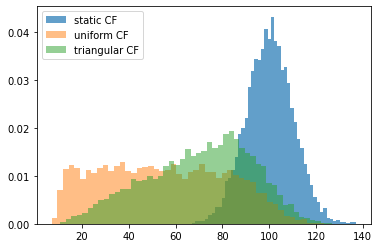

In [72]:
plt.hist(results_reference,density=True,alpha=0.7,label='static CF',bins=50);
plt.hist(results_uncertain_u,density=True,alpha=0.5,label='uniform CF',bins=50);
plt.hist(results_uncertain_t,density=True,alpha=0.5,label='triangular CF',bins=50);
plt.legend();

In [73]:
bw.Method(('test method','1 unspecified','uncertain','uniform')).load()

[(('biosphere3', '051aaf7a-6c1a-4e86-999f-85d5f0830df6'), 1),
 (('biosphere3', 'ddd99a3a-be86-423d-b36a-a9dc8af1b1f8'), 1),
 (('biosphere3', '66f50b33-fd62-4fdd-a373-c5b0de7de00d'), 1),
 (('biosphere3', '230d8a0a-517c-43fe-8357-1818dd12997a'), 10),
 (('biosphere3', '21e46cb8-6233-4c99-bac3-c41d2ab99498'),
  {'amount': 10, 'maximum': 10, 'minimum': 1, 'uncertainty type': 4})]

In [74]:
bw.Method(('test method','1 unspecified','uncertain','triangular')).load()

[(('biosphere3', '051aaf7a-6c1a-4e86-999f-85d5f0830df6'), 1),
 (('biosphere3', 'ddd99a3a-be86-423d-b36a-a9dc8af1b1f8'), 1),
 (('biosphere3', '66f50b33-fd62-4fdd-a373-c5b0de7de00d'), 1),
 (('biosphere3', '230d8a0a-517c-43fe-8357-1818dd12997a'), 10),
 (('biosphere3', '21e46cb8-6233-4c99-bac3-c41d2ab99498'),
  {'amount': 10,
   'maximum': 10,
   'minimum': 1,
   'loc': 10,
   'uncertainty type': 5})]